# Emotion Classification in short texts with BERT

Applying BERT to the problem of multiclass text classification. Our dataset consists of written dialogs, messages and short stories. Each dialog utterance/message is labeled with one of the five emotion categories: joy, anger, sadness, fear, neutral. 

## Workflow: 
1. Import Data
2. Data preprocessing and downloading BERT
3. Training and validation
4. Saving the model

Multiclass text classification with BERT and [ktrain](https://github.com/amaiya/ktrain). Use google colab for a free GPU 

👋  **Let's start** 

In [1]:
# install ktrain on Google Colab
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 2.3MB/s eta 0:00:01
     |████████████████████████████████| 8.5MB 32.7MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 36.8MB/s eta 0:00:01
     |████████████████████████████████| 71kB 22.6MB/s eta 0:00:01
     |████████████████████████████████| 133kB 35.6MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 32.2MB/s eta 0:00:01
     |████████████████████████████████| 8.8MB 37.9MB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 56.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ba/19/24d0f1f454a2c1eb689ca28d2f178db81e5024f42d82729a4ff6771155cf/Whoosh-2.7.4-py2.py3-none-any.whl
     |████████████████████████████████| 2.2MB 39.6MB/s eta 0:00:01
     |████████████████████████████████| 71kB 21.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 18.8MB/s eta 0:00:01
     |████████████████████████████████| 163kB 44.8MB/s eta 0:00:01
     |████████████████████████████████| 51

     |████████████████████████████████| 2.1MB 41.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 15.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/84/e3/2d755b55423787f438269a26d8bd9743698921fdcde748c6fb050b1c1b8c/sentencepiece-0.1.91-cp37-cp37m-macosx_10_6_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1a/8b/4d01ae9a9d50a0bcc7b0b9aae41785d8d9de6fa9bba04dc20b1582181d2d/h5py-2.10.0-cp37-cp37m-macosx_10_6_intel.whl
     |████████████████████████████████| 92kB 23.9MB/s eta 0:00:01
  Running setup.py install for PyYAML ... done
  Running setup.py install for keras-bert ... done
  Running setup.py install for bokeh ... done
  Running setup.py install for seqeval ... done
  Running setup.py install for ktrain ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

## 1. Import Data

In [2]:
data_train = pd.read_csv('data_train2.csv')
data_test = pd.read_csv('data_test2.csv')

X_train = np.array(data_train.Text)
X_test = np.array(data_test.Text)

y_train = np.array(data_train.Emotion)
y_test = np.array(data_test.Emotion)

In [3]:
class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']
encoding = {
    'joy': 0,
    'sadness': 1,
    'fear': 2,
    'anger': 3,
    'neutral': 4
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

## 2. Data preprocessing

* The text must be preprocessed in a specific way for use with BERT. This is accomplished by setting preprocess_mode to ‘bert’. The BERT model and vocabulary will be automatically downloaded

* BERT can handle a maximum length of 512, but let's use less to reduce memory and improve speed. 

In [4]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


## 2. Training and validation


Loading the pretrained BERT for text classification 

In [5]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


Wrap it in a Learner object

In [6]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [10]:
# use lr_find and lr_plot methods to help identify a good learning rate
learner.lr_find(max_epochs=10)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
26724/26724 [==============================] - 8421s 315ms/step - loss: 0.9913 - accuracy: 0.6025
Epoch 2/10
26724/26724 [==============================] - 8355s 313ms/step - loss: 0.7367 - accuracy: 0.7122
Epoch 3/10
26724/26724 [==============================] - 8436s 316ms/step - loss: 0.6629 - accuracy: 0.7390
Epoch 4/10
26724/26724 [==============================] - 8379s 314ms/step - loss: 0.8634 - accuracy: 0.6741
Epoch 5/10
26724/26724 [==============================] - 8663s 324ms/step - loss: 1.3580 - accuracy: 0.5170
Epoch 6/10
26724/26724 [==============================] - 8453s 316ms/step - loss: 1.6625 - accuracy: 0.4463
Epoch 7/10
26724/26724 [==============================] - 8460s 317ms/step - loss: 2.3713 - accuracy: 0.3862


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling lo

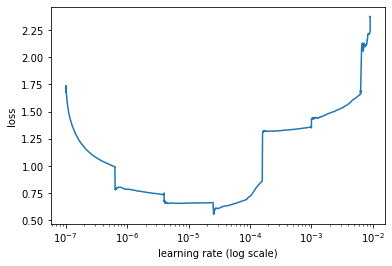

In [11]:
# Visually inspect the loss plot to help identify the maximal learning rate associated with falling loss
learner.lr_plot()

Train the model. More about tuning learning rates [here](https://github.com/amaiya/ktrain/blob/master/tutorial-02-tuning-learning-rates.ipynb)

In [7]:
hist = learner.fit_onecycle(2.5e-5, 3)



begin training using onecycle policy with max lr of 2.5e-05...
Epoch 1/3
26724/26724 [==============================] - 9025s 338ms/step - loss: 0.7310 - accuracy: 0.7123 - val_loss: 0.6852 - val_accuracy: 0.7337
Epoch 2/3
26724/26724 [==============================] - 9041s 338ms/step - loss: 0.6122 - accuracy: 0.7574 - val_loss: 0.6209 - val_accuracy: 0.7523
Epoch 3/3
26724/26724 [==============================] - 9057s 339ms/step - loss: 0.4231 - accuracy: 0.8304 - val_loss: 0.6486 - val_accuracy: 0.7611


In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
# Accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: name 'hist' is not defined

In [9]:
# predictions
log_preds = learner.predict()
preds = np.argmax(log_preds, axis=1)
preds = [class_names[pred] for pred in preds]

In [13]:

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

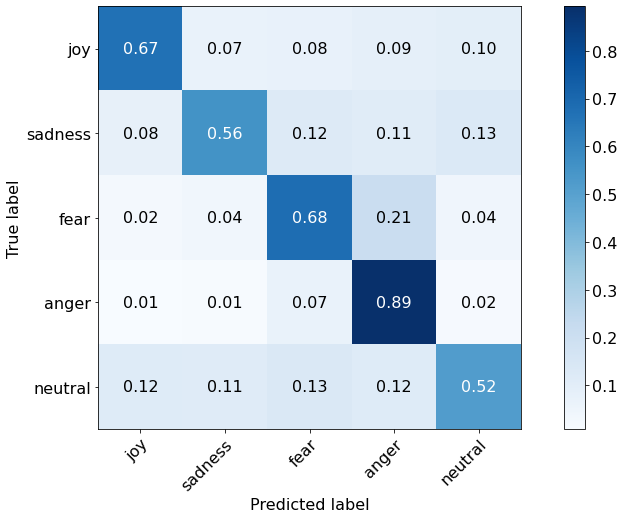

In [15]:
# Plot normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, preds, classes=class_names, normalize=True)
plt.savefig('bert_confusion_new.pdf', bbox_inches='tight')
plt.show()

Validation

In [16]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

         joy       0.68      0.68      0.68      8548
     sadness       0.59      0.52      0.55      4332
        fear       0.64      0.56      0.60      4279
       anger       0.62      0.67      0.64      2975
     neutral       0.86      0.89      0.88     21745

    accuracy                           0.76     41879
   macro avg       0.68      0.66      0.67     41879
weighted avg       0.76      0.76      0.76     41879



array([[ 5843,   372,   316,   206,  1811],
       [  583,  2247,   487,   507,   508],
       [  528,   561,  2377,   337,   476],
       [  226,   289,   209,  1992,   259],
       [ 1474,   358,   320,   176, 19417]])

#### Testing with GRYD data

In [18]:
df = pd.read_csv("SET_processed_latest_version.csv")
for i in range(df.shape[1]):
    df.iloc[:,i]= df.iloc[:,i].replace([555, 777,888,999,'555','777','888','999' ], np.nan)
text=df.loc[:,['GRYD_ETO_ID','S6b_Other_Activities','S11a_Comments','A1_Description','A2_Description','A3_Description','O1_other_group_name','Group_name_part1','PUSH_1','PULL_1']]
text["text_all"] = text.apply(lambda x: ','.join(x.dropna()), axis=1)

In [19]:
text = text[text.S11a_Comments.notna()]
len(text) #991

991

In [20]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['joy', 'sadness', 'fear', 'anger', 'neutral']

In [21]:
import time 

#message = 'I just broke up with my boyfriend'

start_time = time.time() 
#prediction = predictor.predict(message)
pred = predictor.predict(text.S11a_Comments.tolist())

In [22]:
text['Emotion'] = pred
text.Emotion.value_counts()

sadness    478
fear       255
neutral    141
joy         78
anger       39
Name: Emotion, dtype: int64

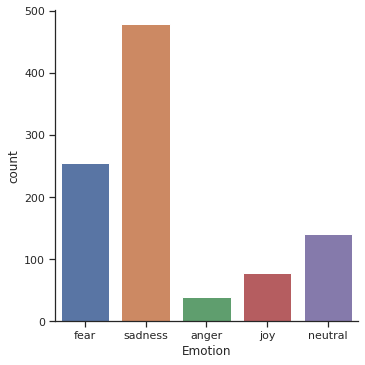

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
sns.set(style="ticks", color_codes=True)
sns_plot = sns.catplot(x="Emotion", kind="count", data=text)
#fig = sns_plot.get_figure()
sns_plot.savefig("bert_classification_results.pdf", bbox_inches='tight')

## 4. Saving Bert model


In [31]:
# let's save the predictor for later use
predictor.save("models/bert_model_2020_10_08")

Done! to reload the predictor use: ktrain.load_predictor